# Sentiment Analysis Notebook
This notebook demonstrates sentiment analysis workflow.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

df = pd.read_csv('../data/tweets_sample.csv')
df.head()

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
import sys
!{sys.executable} -m pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


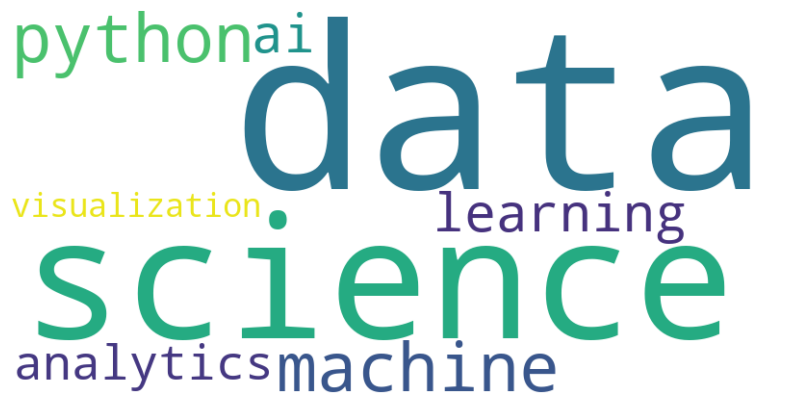

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "data science python machine learning ai analytics data visualization"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [4]:
import sys
!{sys.executable} -m pip install nltk pandas matplotlib seaborn plotly wordcloud vaderSentiment


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...


True

In [7]:
# Load dataset
df = pd.read_csv("../data/tweets_sample.csv", parse_dates=['date'])

# Preview
df.head()


,date,id,username,text,location
0,2024-09-01,1,userA,I love ProductX! New update is awesome #ProductX,New York
1,2024-09-02,2,userB,Terrible customer support today :(,Los Angeles
2,2024-09-03,3,userC,ProductX broke after the update. disappointed.,Chicago
3,2024-09-04,4,userD,Neutral thoughts about ProductX; it's ok.,Houston
4,2024-09-05,5,userE,Amazing improvements — great job team! #happy,Seattle


In [8]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()                           # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)                   # remove mentions
    text = re.sub(r'#', '', text)                      # remove hashtag symbol
    text = re.sub(r'[^a-z0-9\s]', '', text)           # remove punctuation
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

df[['text','clean_text']].head()


,text,clean_text
0,I love ProductX! New update is awesome #ProductX,love productx new update awesome productx
1,Terrible customer support today :(,terrible customer support today
2,ProductX broke after the update. disappointed.,productx broke update disappointed
3,Neutral thoughts about ProductX; it's ok.,neutral thoughts productx ok
4,Amazing improvements — great job team! #happy,amazing improvements great job team happy


In [9]:
sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(label_sentiment)

df[['clean_text','sentiment_score','sentiment']].head()


,clean_text,sentiment_score,sentiment
0,love productx new update awesome productx,0.8519,positive
1,terrible customer support today,-0.1027,negative
2,productx broke update disappointed,-0.7096,negative
3,neutral thoughts productx ok,0.2960,positive
4,amazing improvements great job team happy,0.9313,positive


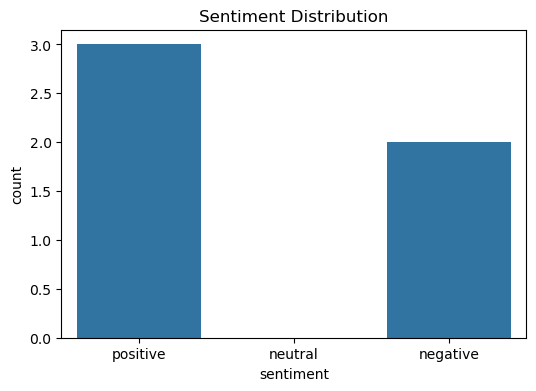

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, order=['positive','neutral','negative'])
plt.title('Sentiment Distribution')
plt.show()


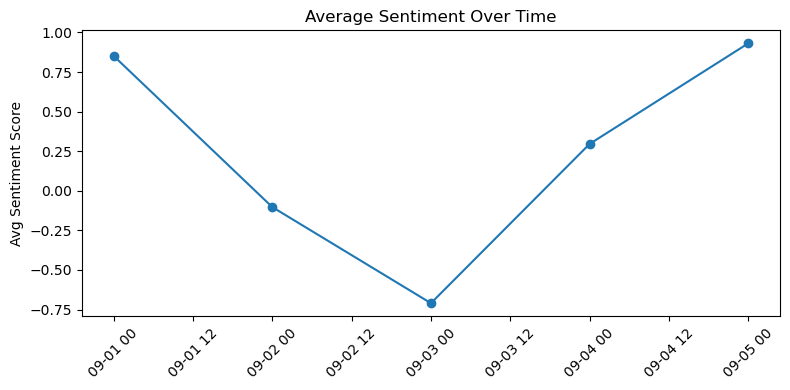

In [22]:
df['date_only'] = df['date'].dt.date
daily = df.groupby('date_only')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(daily['date_only'], daily['sentiment_score'], marker='o')
plt.title('Average Sentiment Over Time')
plt.ylabel('Avg Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


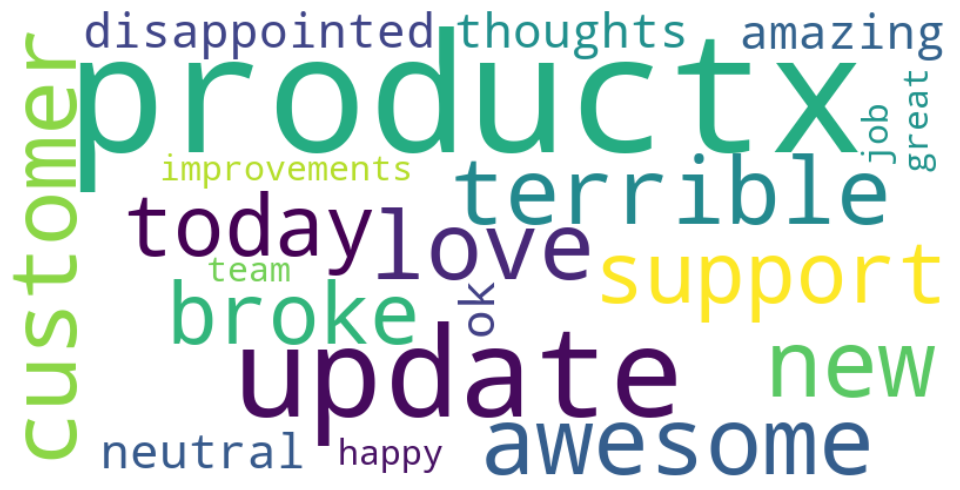

In [23]:
text = " ".join(df['clean_text'].astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


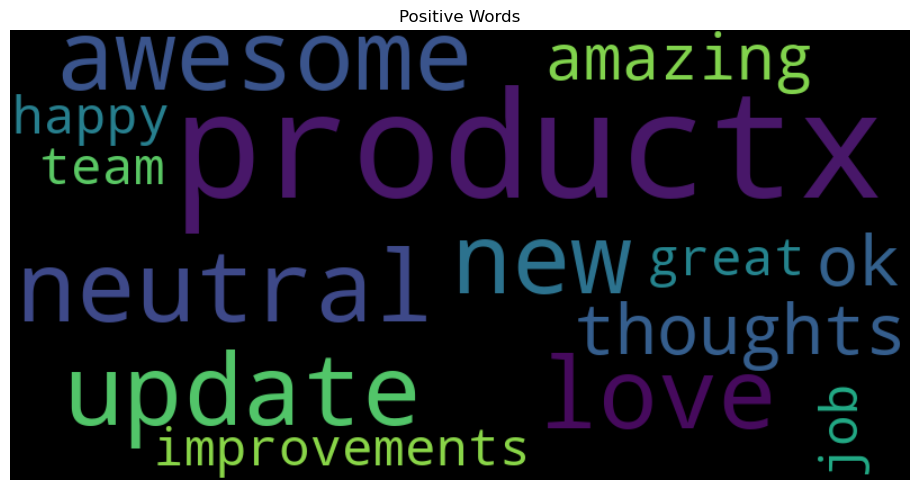

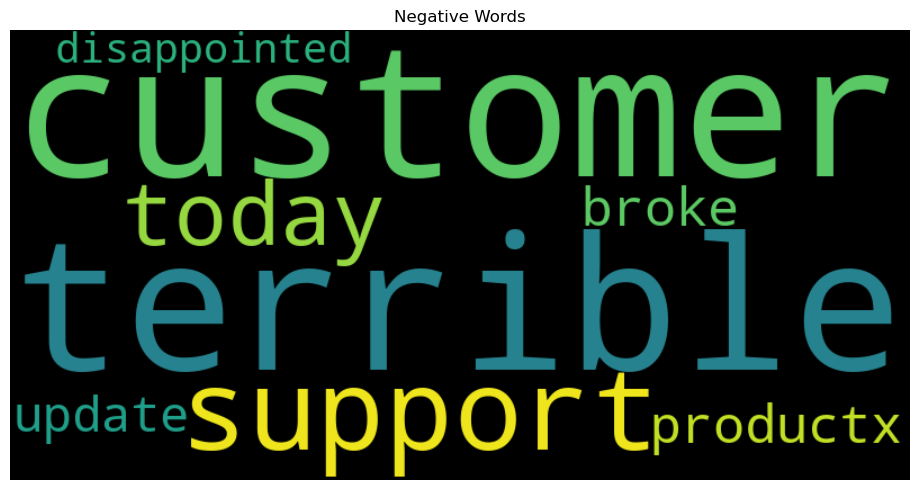

In [20]:
for s in ['positive','neutral','negative']:
    text = " ".join(df[df['sentiment']==s]['clean_text'].astype(str))
    if text.strip()=="":
        continue
    wc = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.title(f"{s.capitalize()} Words")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [17]:
import collections

hashtags = []
for t in df['text'].astype(str):
    tags = re.findall(r'#(\w+)', t)
    hashtags.extend([tag.lower() for tag in tags])

top_hashtags = collections.Counter(hashtags).most_common(10)
pd.DataFrame(top_hashtags, columns=['hashtag','count'])


,hashtag,count
0,productx,1
1,happy,1


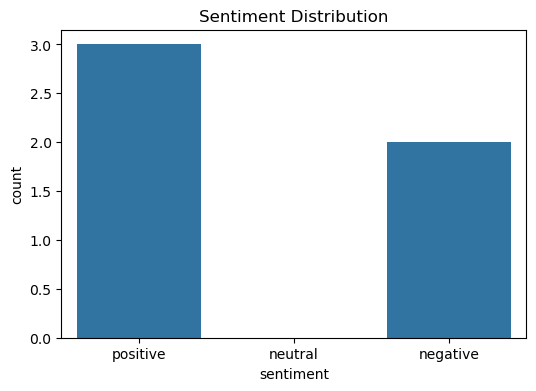

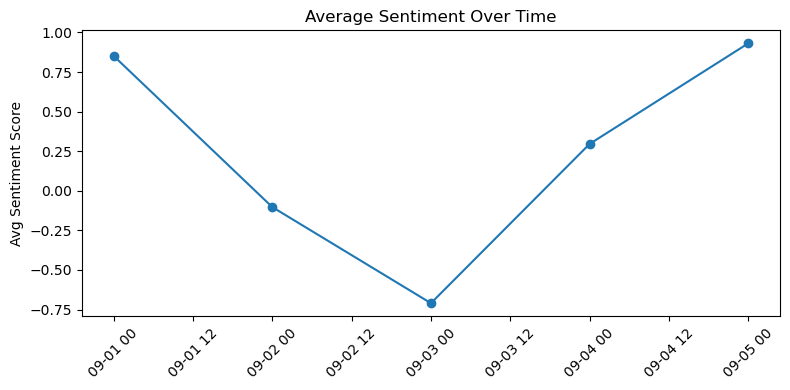

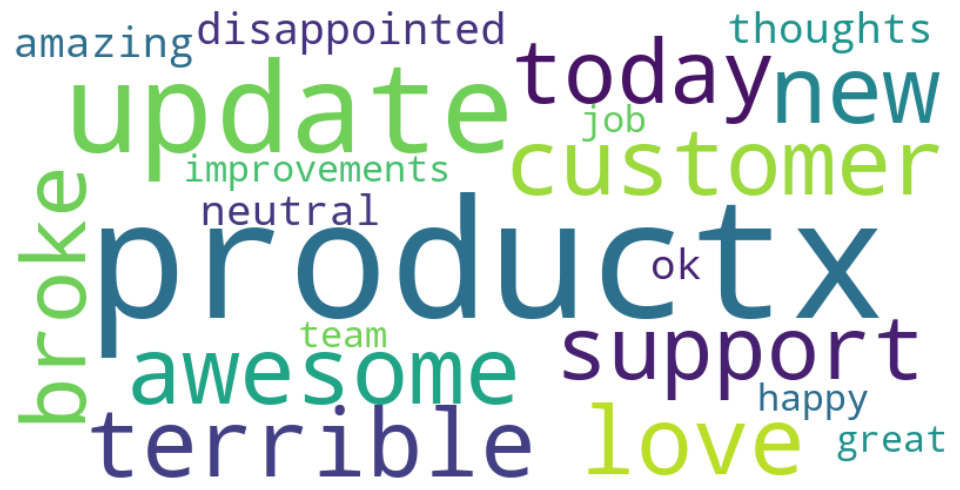

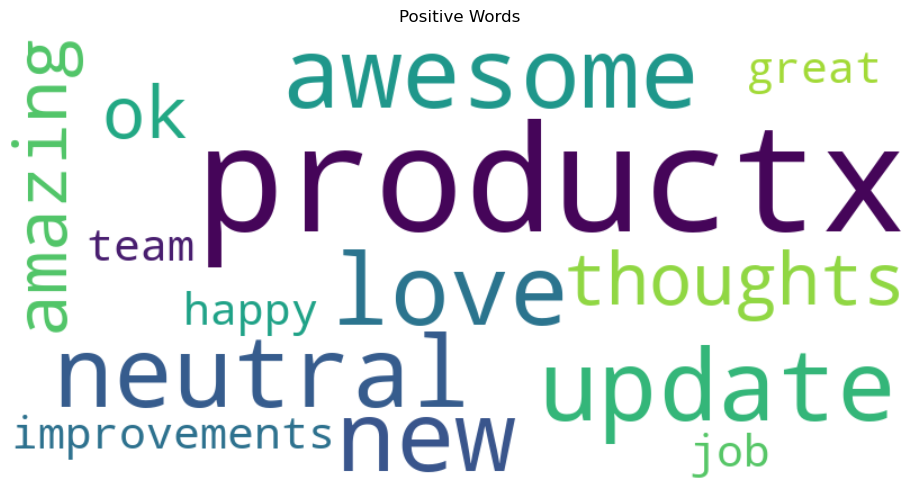

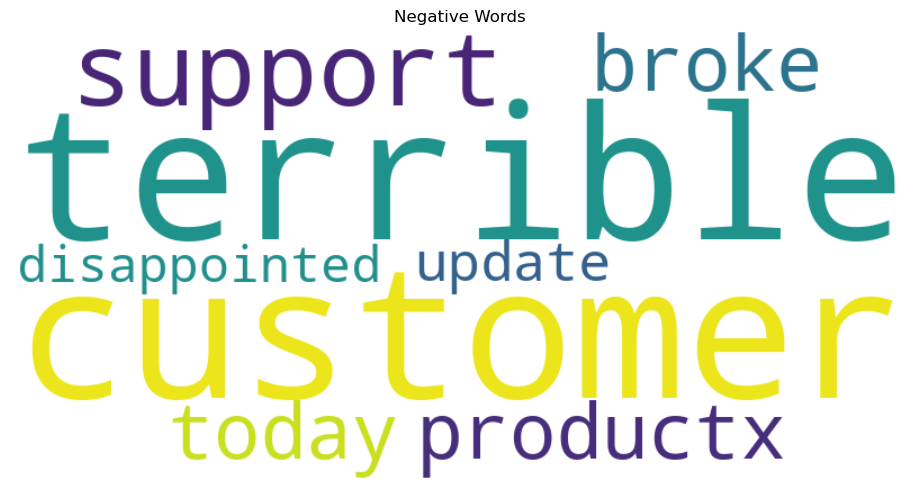

,hashtag,count
0,productx,1
1,happy,1


In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# 1️ Create dashboards folder if it doesn't exist
os.makedirs("../dashboards", exist_ok=True)

# 2️ Sentiment Distribution (Bar Chart)
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, order=['positive','neutral','negative'])
plt.title('Sentiment Distribution')
plt.savefig("../dashboards/sentiment_distribution.png", dpi=150)
plt.show()

# 3️ Average Sentiment Over Time (Line Chart)
df['date_only'] = df['date'].dt.date
daily = df.groupby('date_only')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(daily['date_only'], daily['sentiment_score'], marker='o')
plt.title('Average Sentiment Over Time')
plt.ylabel('Avg Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../dashboards/sentiment_time_series.png", dpi=150)
plt.show()

# 4️ WordCloud of All Tweets
text_all = " ".join(df['clean_text'].astype(str))
wc_all = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig("../dashboards/wordcloud_all.png", dpi=150)
plt.show()

# 5️ WordClouds by Sentiment
for s in ['positive','neutral','negative']:
    text = " ".join(df[df['sentiment']==s]['clean_text'].astype(str))
    if text.strip() == "":
        continue
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.title(f"{s.capitalize()} Words")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"../dashboards/wordcloud_{s}.png", dpi=150)
    plt.show()

# 6️ Optional: Top Hashtags
import collections
hashtags = []
for t in df['text'].astype(str):
    tags = re.findall(r'#(\w+)', t)
    hashtags.extend([tag.lower() for tag in tags])

top_hashtags = collections.Counter(hashtags).most_common(10)
pd.DataFrame(top_hashtags, columns=['hashtag','count'])
